In [97]:
import pandas as pd
import numpy as np

In [98]:
df = pd.read_csv(r'C:\Users\S545242\OneDrive - nwmissouri.edu\Desktop\income.csv')

In [99]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [100]:
# same with workclass
df.workclass.value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [101]:
df.occupation.value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [102]:
# Replace all features that have binary categorical values with 0/1
df = pd.concat([df.drop('occupation', axis=1), pd.get_dummies(df.occupation).add_prefix('occupation_')], axis=1)
df = pd.concat([df.drop('workclass', axis=1), pd.get_dummies(df.workclass).add_prefix('workclass_')], axis=1)
df = pd.concat([df.drop('marital-status', axis=1), pd.get_dummies(df['marital-status']).add_prefix('marital-status_')], axis=1)
df = pd.concat([df.drop('relationship', axis=1), pd.get_dummies(df.relationship).add_prefix('relationship_')], axis=1)
df = pd.concat([df.drop('race', axis=1), pd.get_dummies(df.race).add_prefix('race_')], axis=1)
df = pd.concat([df.drop('native-country', axis=1), pd.get_dummies(df['native-country']).add_prefix('native-country_')], axis=1)


In [103]:
# drop education since we already have educational num
df = df.drop('education', axis=1)

In [104]:
df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,Male,0,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,Male,0,0,50,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,Male,0,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,Male,7688,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,Female,0,0,30,<=50K,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,Female,0,0,38,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,154374,9,Male,0,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,151910,9,Female,0,0,40,<=50K,0,1,...,0,0,0,0,0,0,0,1,0,0
48840,22,201490,9,Male,0,0,20,<=50K,0,1,...,0,0,0,0,0,0,0,1,0,0


In [105]:
# Everything is binary code except gender and income
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

In [106]:
df['income']

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 48842, dtype: int64

In [107]:
df.columns

Index(['age', 'fnlwgt', 'educational-num', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'income', 'occupation_?',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving', 'workclass_?',
       'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'marital-status_Divorced',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Nev

<AxesSubplot:>

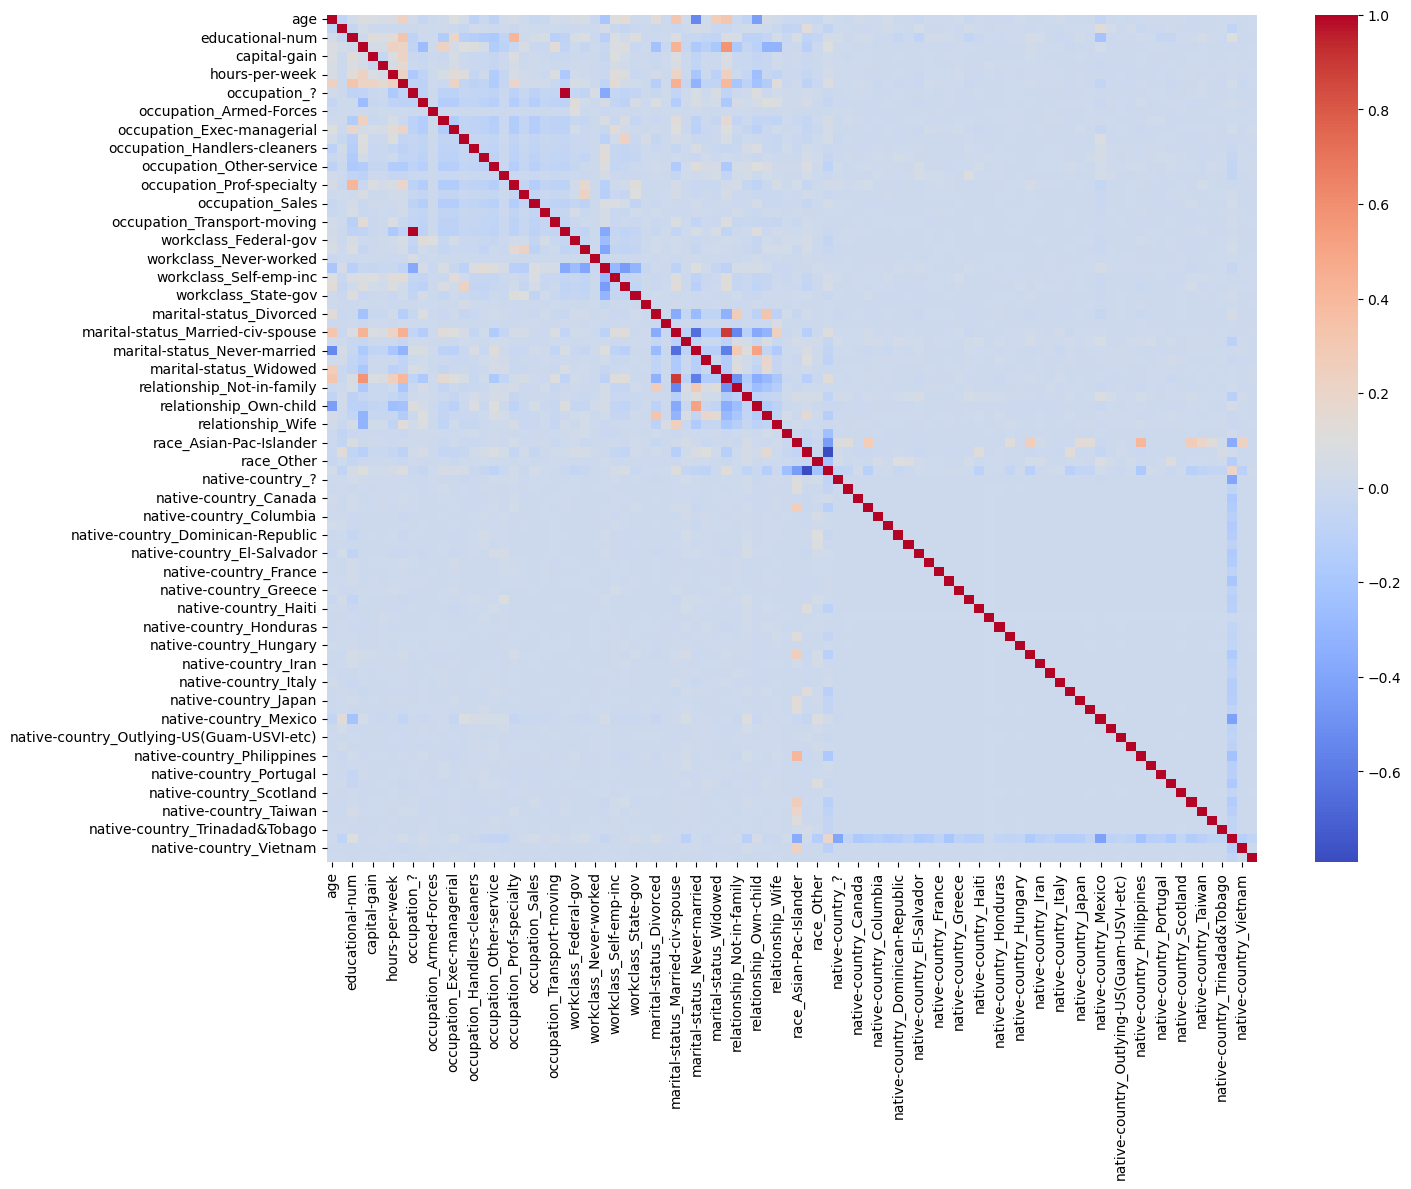

In [108]:
# importing seaborn and matplotlib
# correlation bewteen columns
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,11))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')

In [109]:
df.corr()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
age,1.000000,-0.076628,0.030940,0.088120,0.077229,0.056944,0.071558,0.230369,0.025683,-0.038116,...,0.007016,0.005474,0.012281,-0.001942,-0.011872,-0.001766,0.001056,0.011888,-0.012337,0.002905
fnlwgt,-0.076628,1.000000,-0.038761,0.027739,-0.003706,-0.004366,-0.013519,-0.006339,-0.005405,0.007480,...,-0.013577,0.008708,-0.006523,-0.010342,-0.001733,-0.001512,0.004153,-0.070645,-0.007479,0.004699
educational-num,0.030940,-0.038761,1.000000,0.009328,0.125146,0.080972,0.143689,0.332613,-0.080053,0.004142,...,-0.047816,-0.041776,0.000907,0.012984,0.045420,0.007283,-0.010201,0.104210,-0.007544,-0.005798
gender,0.088120,0.027739,0.009328,1.000000,0.047094,0.045480,0.228560,0.214628,-0.063844,-0.260349,...,0.009649,-0.009940,-0.002178,-0.005272,0.003041,-0.007117,-0.009342,-0.011167,-0.001545,0.005262
capital-gain,0.077229,-0.003706,0.125146,0.047094,1.000000,-0.031441,0.082157,0.223013,-0.019157,-0.029105,...,-0.004355,-0.006137,-0.002317,0.003906,0.004260,-0.002781,-0.003039,0.004191,-0.002673,-0.000474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
native-country_Thailand,-0.001766,-0.001512,0.007283,-0.007117,-0.002781,-0.002338,0.008558,-0.004219,-0.002575,-0.001157,...,-0.000919,-0.001525,-0.000514,-0.001204,-0.000905,1.000000,-0.000583,-0.073329,-0.001041,-0.000538
native-country_Trinadad&Tobago,0.001056,0.004153,-0.010201,-0.009342,-0.003039,0.004028,-0.002911,-0.009107,-0.002068,0.007917,...,-0.000872,-0.001446,-0.000488,-0.001143,-0.000859,-0.000583,1.000000,-0.069564,-0.000988,-0.000510
native-country_United-States,0.011888,-0.070645,0.104210,-0.011167,0.004191,0.009449,0.004390,0.032551,0.005546,0.022126,...,-0.109626,-0.181890,-0.061346,-0.143695,-0.107976,-0.073329,-0.069564,1.000000,-0.124226,-0.064202
native-country_Vietnam,-0.012337,-0.007479,-0.007544,-0.001545,-0.002673,-0.000118,-0.008289,-0.015542,-0.004082,0.010905,...,-0.001557,-0.002583,-0.000871,-0.002040,-0.001533,-0.001041,-0.000988,-0.124226,1.000000,-0.000912


In [110]:
# filtering out features that aren't correlated to income in absoute values 
correlations = df.corr()['income'].abs()
sorted_correlations = correlations.sort_values()  # sorting absolute correlation values in asc order
num_Col_to_drop = int(0.8 * len(df.columns)) # 80% of total columns and casting to int
cols_to_drop = sorted_correlations.iloc[:num_Col_to_drop].index  #  selecting the first num_Col_to_drop elements from the sorted correlations.
df_dropped = df.drop(cols_to_drop, axis=1) 

In [111]:
df_dropped

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,workclass_Self-emp-inc,marital-status_Divorced,marital-status_Married-civ-spouse,marital-status_Never-married,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,25,7,1,0,0,40,0,0,0,0,0,0,0,1,0,0,1,0,0
1,38,9,1,0,0,50,0,0,0,0,0,0,1,0,1,0,0,0,0
2,28,12,1,0,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
3,44,10,1,7688,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
4,18,10,0,0,0,30,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,0,38,0,0,0,0,0,0,1,0,0,0,0,0,1
48838,40,9,1,0,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
48839,58,9,0,0,0,40,0,0,0,0,0,0,0,0,0,0,0,1,0
48840,22,9,1,0,0,20,0,0,0,0,0,0,0,1,0,0,1,0,0


<AxesSubplot:>

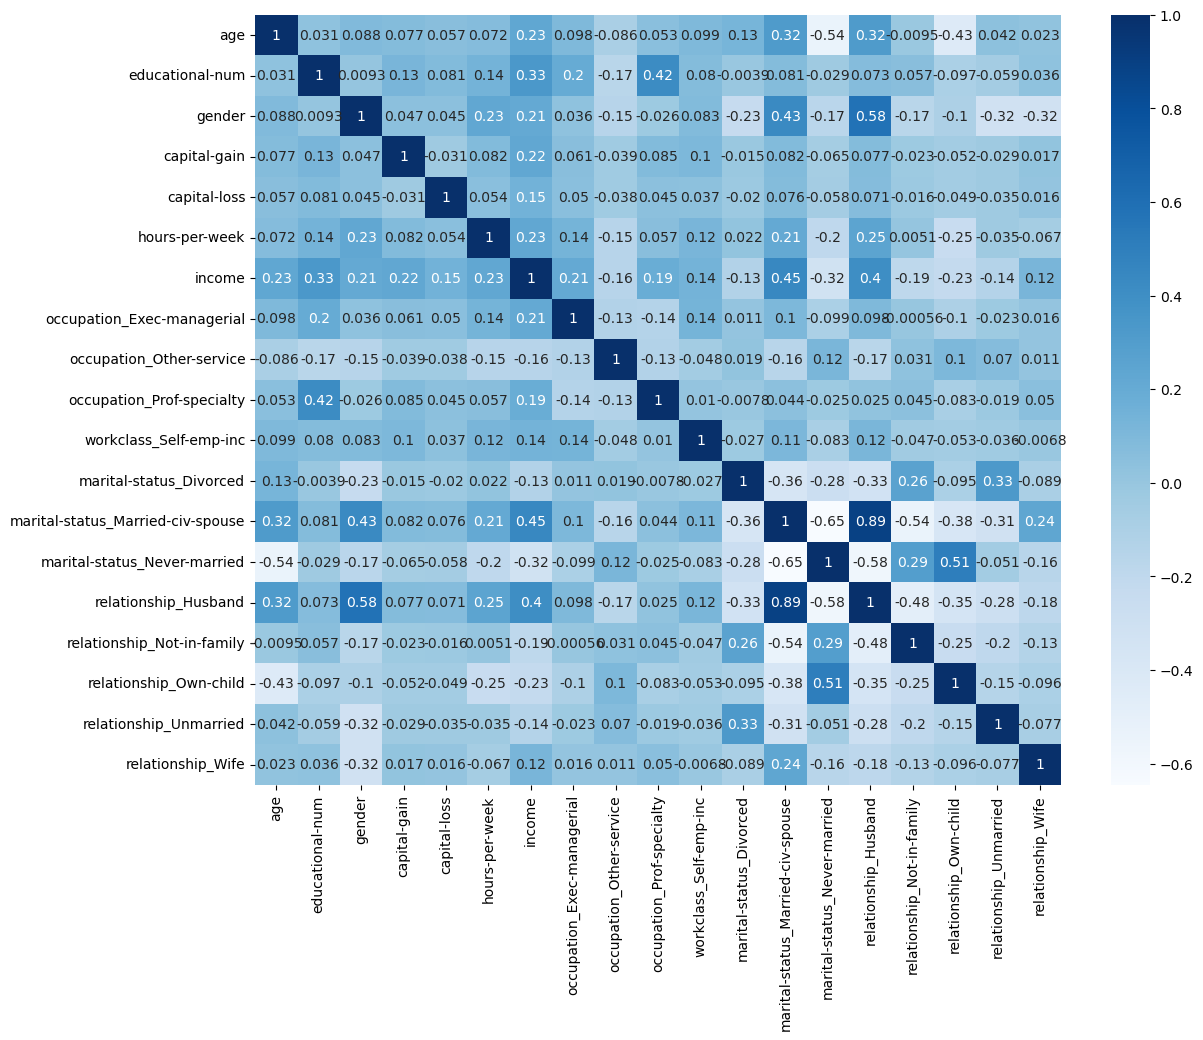

In [112]:
plt.figure(figsize=(13, 10))
sns.heatmap(df_dropped.corr(), annot=True, cmap='Blues')

In [113]:
# now that we have correlations we are gonna implement decision tree
# use train_test_split for splitting datasets and testing
# Algorithm selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# feature 'fnlwgt' represent amount of people in each group. Doesn't really matter for our model so we'll drop it
# df = df.drop('fnlwgt', axis=1)

train_df, test_df = train_test_split(df, test_size=0.2)

In [114]:
test_df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
41728,30,63861,12,0,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
42049,19,236879,10,0,0,0,35,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1754,27,151382,9,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
20162,63,134699,9,0,0,0,25,0,0,0,...,0,0,0,0,0,0,0,1,0,0
28484,26,34393,10,0,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34395,44,169980,7,1,0,0,60,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11531,27,150861,10,0,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4455,84,157778,10,0,0,0,6,0,1,0,...,0,0,0,0,0,0,0,1,0,0
48126,43,254146,10,1,0,1902,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [115]:
# training the clasiffier (spliting data)
train_x = train_df.drop('income', axis=1)
train_y = train_df['income']

test_x = test_df.drop('income', axis=1)
test_y = test_df['income']

In [116]:
forest = RandomForestClassifier()
forest.fit(train_x, train_y)

RandomForestClassifier()

In [117]:
forest.score(test_x, test_y)

0.8529020370559934

In [118]:
forest.feature_importances_

array([1.51436887e-01, 1.70684565e-01, 1.08818612e-01, 1.24204380e-02,
       9.94162142e-02, 3.11492285e-02, 8.27929962e-02, 1.72569492e-03,
       4.56853716e-03, 1.05322738e-04, 5.79710401e-03, 1.82161273e-02,
       3.75060848e-03, 3.17147194e-03, 4.29883290e-03, 7.09021674e-03,
       1.25364764e-04, 1.72081245e-02, 2.63886861e-03, 5.79434761e-03,
       4.08175395e-03, 3.86012673e-03, 1.79746988e-03, 4.66586965e-03,
       5.00293132e-03, 2.29477403e-06, 8.77675715e-03, 5.44682219e-03,
       7.41571203e-03, 3.94846117e-03, 1.27281517e-04, 5.25576798e-03,
       2.65546066e-04, 6.72413019e-02, 8.27318840e-04, 2.38345241e-02,
       1.63105875e-03, 1.47417968e-03, 4.38689906e-02, 1.05012904e-02,
       1.73094469e-03, 1.05732692e-02, 5.77968495e-03, 1.07460789e-02,
       1.13774167e-03, 2.71706676e-03, 4.61882053e-03, 8.86169389e-04,
       5.60227870e-03, 2.48359807e-03, 2.99609613e-04, 1.23993075e-03,
       4.44898291e-04, 2.27335634e-04, 6.14161400e-04, 2.56048380e-04,
      

In [119]:
forest.feature_names_in_

array(['age', 'fnlwgt', 'educational-num', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'occupation_?',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'workclass_?', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent',
       'marital-status

In [120]:
# rearrenging it as a diccionary zipz. Zipping together two lists: forest.feature_names_in_ and forest.feature_importances_
# sorting diccionary desc order. Feature with highest importance goes first.
importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key=lambda x: x[1], reverse=True)}

# this is how individual features affect the result 
importances

{'fnlwgt': 0.1706845648501796,
 'age': 0.15143688686449253,
 'educational-num': 0.10881861223565348,
 'capital-gain': 0.09941621415068447,
 'hours-per-week': 0.08279299621830737,
 'marital-status_Married-civ-spouse': 0.06724130188129757,
 'relationship_Husband': 0.043868990559695745,
 'capital-loss': 0.031149228477987685,
 'marital-status_Never-married': 0.02383452406806525,
 'occupation_Exec-managerial': 0.01821612729240065,
 'occupation_Prof-specialty': 0.017208124525740897,
 'gender': 0.012420437979200331,
 'relationship_Wife': 0.010746078932840885,
 'relationship_Own-child': 0.010573269163464414,
 'relationship_Not-in-family': 0.010501290374704682,
 'workclass_Private': 0.008776757146037178,
 'workclass_Self-emp-not-inc': 0.0074157120270864196,
 'occupation_Other-service': 0.007090216735064857,
 'occupation_Craft-repair': 0.005797104011330855,
 'occupation_Sales': 0.005794347608330459,
 'relationship_Unmarried': 0.005779684953656983,
 'native-country_United-States': 0.0057715368732

In [121]:
# Finding best model combination.
# The GridSearchCV will then perform a cross-validated grid search over the specified hyperparameter values, evaluating the model's performance for each combination.
from sklearn.model_selection import GridSearchCV as gscv

paramGrid={
    'n_estimators':[50, 100, 250],
    'max_depth':[5, 10, 30, None],
    'min_samples_split':[2, 4],
    'max_features':['sqrt', 'log2']
}

grid_search = gscv(estimator=RandomForestClassifier(), 
                   param_grid=paramGrid, verbose=10)

In [ ]:
# took about 25 minutes to fully train the model
grid_search.fit(train_x, train_y)

In [ ]:
# get the best estimator from the model
forest = grid_search.best_estimator_

In [ ]:
# higher testing score for this model
forest.score(test_x, test_y)

In [ ]:
importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key=lambda x: x[1], reverse=True)}

# this is how individual features affect the result 
importances

In [ ]:
# We can conclude by saying that features like age, educational_num, capital_gain, marital status, hours per week and so forth are significant in the prediction of a person's income